In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

def load_df(file_name):
    df = pd.DataFrame(pd.read_pickle(file_name))
    return df

In [2]:
#load broad data and close up on high remove p data
er = load_df("compiled_output_jj2_erdos.pkl")
er2 = load_df("compiled_output_jj4_erdos.pkl")
#Fix experiment number before joining 
x = len(er)
er2['exp_num'] += x
er3 = pd.concat([er, er2], ignore_index=True)
#Make lists that give a set number for each set of hyperparameters so that I can filter by hyperparameters
e1 = [i//250 for i in range(len(er))]
e2 = [i//150 for i in range(len(er2))]
e3 = e1 + e2
er3['hyper_param'] = e3
#Remove failed experiments
er3 = er3[er3['adj_size']>0]

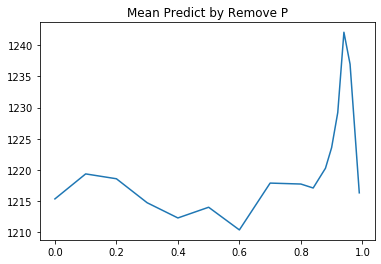

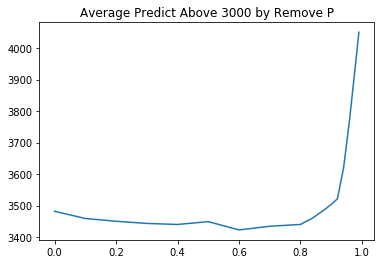

In [3]:
#Here I looked at mean predict by remove p and then look at them for the best values
df1=er3.groupby(er3['remove_p']).aggregate(np.mean)
plt.plot(df1.index,df1["mean_pred"])
plt.title("Mean Predict by Remove P")
plt.show()
df2=er3.groupby(er3['exp_num']).aggregate(np.mean)
best=df2[df2['mean_pred'] > 3000]
#Next line is becasue of rounding errors
best['remove_p']= np.round(best['remove_p'],decimals=2)
bestest = best.groupby(best['remove_p']).aggregate(np.mean)
plt.plot(bestest.index,bestest["mean_pred"])
plt.title("Average Predict Above 3000 by Remove P")
plt.show()

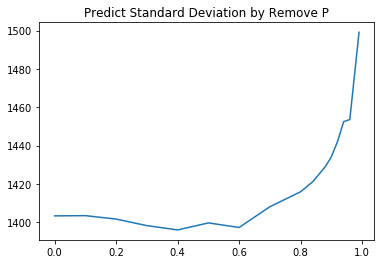

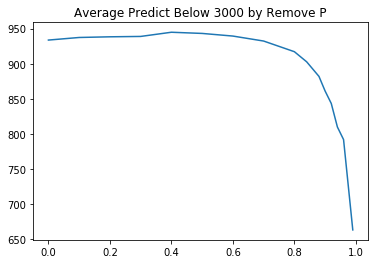

In [4]:
#I was curious of why there was a spike, but the mean didn't change, so I looked at the standard deviation and below 3000
df1=er3.groupby(er3['remove_p']).aggregate(np.var)
plt.plot(df1.index,np.sqrt(df1["mean_pred"]))
plt.title("Predict Standard Deviation by Remove P")
plt.show()
df2=er3.groupby(er3['exp_num']).aggregate(np.mean)
worst=df2[df2['mean_pred'] <= 3000]
#Next line is becasue of rounding errors
worst['remove_p']= np.round(worst['remove_p'],decimals=2)
worstest = worst.groupby(worst['remove_p']).aggregate(np.mean)
plt.plot(worstest.index,worstest["mean_pred"])
plt.title("Average Predict Below 3000 by Remove P")
plt.show()

This is when I realized that the graphs above with a nice curve up and down were only looking at all of the point above and below 3000 and might be entirely because of high standard deviation. So I wanted to know if given hyperparameters where remove_p of zero produced high results would the results get higher?

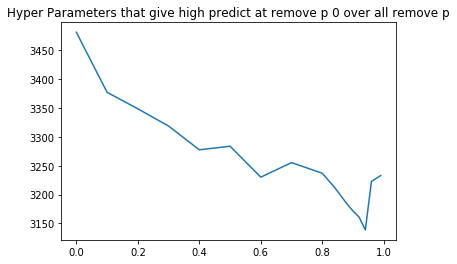

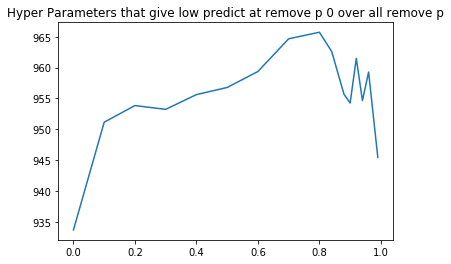

In [5]:
df2=er3.groupby(er3['exp_num']).aggregate(np.mean)
#Finds hyper parameters that have high mean predict
better = df2['hyper_param'][df2['mean_pred'] > 3000][df2['remove_p']==0]
best=df2[df2.hyper_param.isin(better)]
worst=df2[~df2.hyper_param.isin(better)]
#Next lines are becasue of rounding errors
best['remove_p']= np.round(best['remove_p'],decimals=2)
worst['remove_p']= np.round(worst['remove_p'],decimals=2)
bestest = best.groupby(best['remove_p']).aggregate(np.mean)
plt.plot(bestest.index,(bestest["mean_pred"]))
plt.title("Hyper Parameters that give high predict at remove p 0 over all remove p")
plt.show()
worstest = worst.groupby(worst['remove_p']).aggregate(np.mean)
plt.plot(worstest.index,(worstest["mean_pred"]))
plt.title("Hyper Parameters that give low predict at remove p 0 over all remove p")
plt.show()

So it doesn't look like remove p is actually helping good hyperparameters, but it is increasing variance wich might be good or might be bad. Depending on what your trying to do. Here is a boxplot to see the spread.

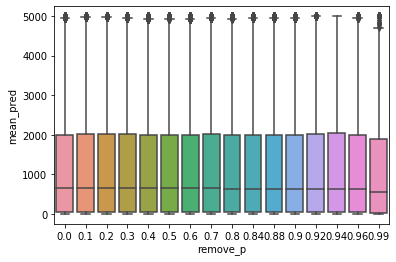

In [6]:
sb.boxplot(er3['remove_p'],er3['mean_pred'])